## The Product Pricer

**The model that can predict how much a product costs based on the description**

## Data Curation Part1

#### Subset of data we work on is Home Appliances

Amazon Reviews Dataset (2023)[(https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023)]

In [1]:
#imports
!python3.12 -m pip install --upgrade pip
!git config --global credential.helper store


import os
import matplotlib.pyplot as plt
!pip install --upgrade transformers datasets huggingface_hub
# !python3.12 -m pip install --upgrade --force-reinstall huggingface_hub
from huggingface_hub import login
from dotenv import load_dotenv
!pip install datasets
from datasets import load_dataset, Dataset, DatasetDict
!pip install ipywidgets
from items import Item





In [2]:
# environment
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")
if openai_api_key:
    print("api key found")

api key found


In [3]:
hf_token = os.getenv("HUGGINGFACE_TOKEN")
login(token=hf_token, add_to_git_credential=True )
if hf_token:
    print("hf token found")

hf token found


In [4]:
# load in our dataset
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Appliances", split="full",trust_remote_code=True)
print(f" number of appliances :{len(dataset):,}")

 number of appliances :94,327


In [5]:
#investigate a particular datpoint
datapoint = dataset[100]
print(datapoint)
# price_0 = dataset[0]['prices']
# print(price_0)
# print(f"title:{datapoint['title']}")
# print(f"description:{datapoint['description']}")
# print(f"features:{datapoint['features']}")
# print(f"details:{datapoint['details']}")
# print(f"prices:{datapoint['price']}")


{'main_category': 'Amazon Home', 'title': '2 Pack Needle Cleaning Tools Compatible With Keurig 2.0 Coffeemakers Needle Cleaning Tool No More Coffee Grounds Left In Coffee Or Semi-Finished Coffee(Orange)', 'average_rating': 4.2, 'rating_number': 41, 'features': ['【Compatible With】-- Compatible with all Keurig (R) 2.0 and Plus Series brewers / coffeemakers, including models K200, K250, K300, K350, K375, K400, K450, K460, K475, K500, K550, K560, K575, K600, K650, K660, K675.', '【Please Note】--Will not work with non-Keurig (R) brewers or other Keurig (R) models not listed.Will not work with K55 Machine or K-Elite', '【Premium Quality】-- The replacement part is made from durable high quality material and well-tested by the manufacturer', '【Great Application】-- The needle cleaning tool removes those grounds and gets your Keurig (R) brewer running smoothly again', "【Buy Confidence】-- Non Original Parts.For any reason you're not completely satisfied, just contact us.Buy it with confidence.The p

In [6]:
#we want to see how many of appliances have prices
count = 0
for datapoint in dataset:
    price = datapoint["price"]
    if price !=str(None):
        count+=1
    else:
        continue
print(count)
        

46726


In [7]:
#another code for getting the number of appliances with price 
count = 0
for datapoint in dataset:
    try:
        price = float(datapoint['price'])
        # print(price)
        if price > 0:
            count +=1
    except ValueError as e:
        pass

print(f"the number of appliance with price {count:,} which is {count/len(dataset)*100:.1f}%")
    
        
        

the number of appliance with price 46,726 which is 49.5%


In [8]:
# for those with prices we ware going to gather the price and the length
# we want to add up total number of characters in title, description, features and details

prices = []
lengths = []

for datapoint in dataset:
    try:  
        price = float(datapoint["price"])
        if price > 0:
            prices.append(price)
            
            contents = datapoint["title"] + str(datapoint["description"]) + str(datapoint["details"]) + str(datapoint["features"])
            lengths.append(len(contents))
    except ValueError as e:
        pass        
        

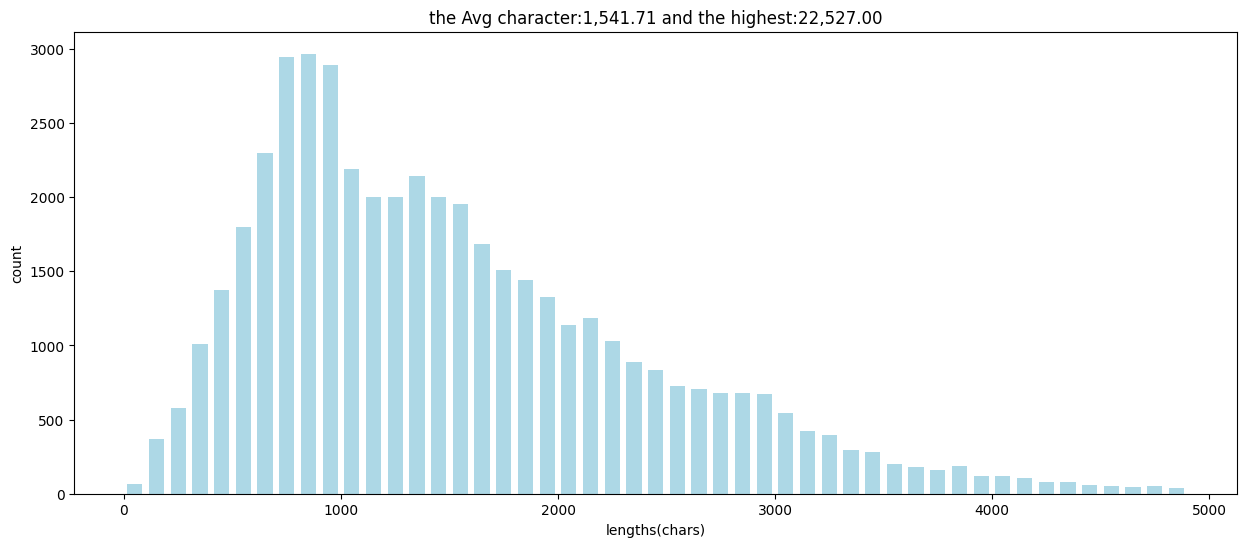

In [9]:
#visualize the count of characters each appliances has in their descriptions
# plot the distributions of number of characters
plt.figure(figsize=(15, 6))
plt.title(f"the Avg character:{sum(lengths)/ len(lengths):,.2f} and the highest:{max(lengths):,.2f}")
plt.xlabel("lengths(chars)")
plt.ylabel("count")
plt.hist(x = lengths, rwidth=0.7, color="lightblue", bins=range(0, 5000, 100))
plt.show()


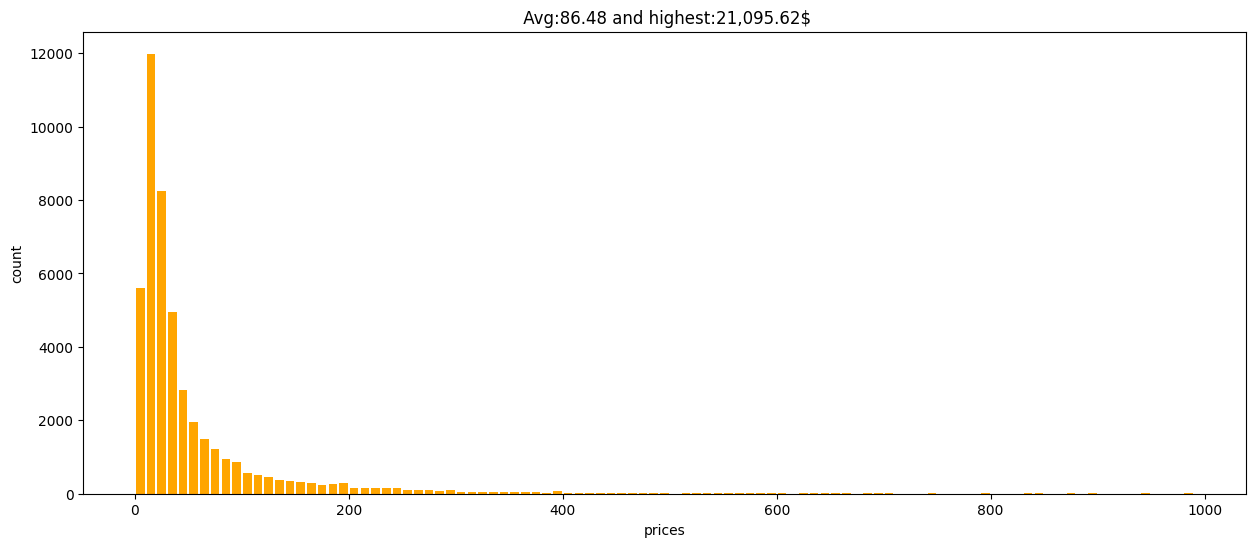

In [12]:
#plot the distributions of prices
plt.figure(figsize=(15, 6))
plt.title(f" Avg:{sum(prices) / len(prices):,.2f} and highest:{max(prices):,.2f}$")
plt.xlabel("prices")
plt.ylabel("count")
plt.hist(x=prices, rwidth=0.8, color="orange", bins=range(0, 1000, 10))
plt.show()

#from histogram we can see the large number of appliances with cheap prices which skewded the distributions

In [10]:
# lets see what are these super expensive things more than 21000 $. lets have a quick look what are these products
titles = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 1000:
            titles.append(datapoint['title'])
            
    except ValueError as e:
        pass
# print(titles)
print(len(titles))
    

606


In [7]:
# #create an item object each with price
items = []
for datapoint in dataset:
    try:
        
        price = float(datapoint['price'])
        if price > 0:
            item = Item(datapoint, price)
            if item.include:
                items.append(item)
            
    except ValueError as e:
        pass 
        
print(f"there are {len(items):,} items")

there are 29,191 items


In [5]:
#create an item object each with price
# # from items import Item
# items = []
# datapoint = dataset[66] 
# print(datapoint['features'])
# print("="*80)

# print(datapoint['details'])
# print("="*80)
# price = float(datapoint['price'])
# if price > 0:
#     item = Item(datapoint, price)
#     print(f"item:{item}")
#     if item.include:
#         items.append(item)
            
        
# print(f"there are {len(items):,} items")

['Triple Action Filtration: Pureline filters use advanced active coconut shell carbon block, with 2x larger surface area and more micropores. First the water passes through the pores of the filter, The water is further purified through two separate stages of ionization filtration that take place as the water passes through the carbon block to your refrigerator. the filter material in the Pureline refrigerator filter improves the overall taste of your water', 'Top Notch certification and Premium Material: Pureline filters are completely made with Lead-Free, BPA-Free and Food Grade materials as verified by our NSF 372 and NSF 42 Certification and WQA, and IAPMO. And Pureline carbon blocks have been independently tested to filter your water.', 'No Leakage and Perfect Fit Garanteed: No Worreis about water leakages, Pureline filters have been manufactured to the exact designs and specifications as the original Brand filter, with a precision measurement technology to make sure that you get t

In [6]:
# investigate the prompts that will be used during training- the models learns to complete this
items[0]


<WD12X10327 Rack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces AP4980629 PS3486910 1811003 = $8.99>

In [11]:
print(items[1].prompt)

How much does this cost to the nearest dollar?

Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces - Quick DIY Repair Solution
Pivot Block For Vernicle Mullion Strip On Door - A high-quality exact equivalent for part numbers and Compatibility with major brands - Door Guide is compatible with Whirlpool, Amana, Dacor, Gaggenau, Hardwick, Jenn-Air, Kenmore, KitchenAid, and Maytag. Quick DIY repair - Refrigerator Door Guide Pivot Block Replacement will help if your appliance door doesn't open or close. Wear work gloves to protect your hands during the repair process. Attentive support - If you are uncertain about whether the block fits your refrigerator, we will help. We generally put forth a valiant effort to guarantee you are totally

Price is $17.00


In [12]:
items[1].title

'WP67003405 67003405 Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces AP6010352 8208254 PS11743531 - Quick DIY Repair Solution'

In [8]:
items[1].token_count

177

In [8]:
items[1].price

16.52

In [11]:
# investigate the prompt that will be used during training - the model has to complete this
print(items[1].test_prompt())

How much does this cost to the nearest dollar?

Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces - Quick DIY Repair Solution
Pivot Block For Vernicle Mullion Strip On Door - A high-quality exact equivalent for part numbers and Compatibility with major brands - Door Guide is compatible with Whirlpool, Amana, Dacor, Gaggenau, Hardwick, Jenn-Air, Kenmore, KitchenAid, and Maytag. Quick DIY repair - Refrigerator Door Guide Pivot Block Replacement will help if your appliance door doesn't open or close. Wear work gloves to protect your hands during the repair process. Attentive support - If you are uncertain about whether the block fits your refrigerator, we will help. We generally put forth a valiant effort to guarantee you are totally

Price is $


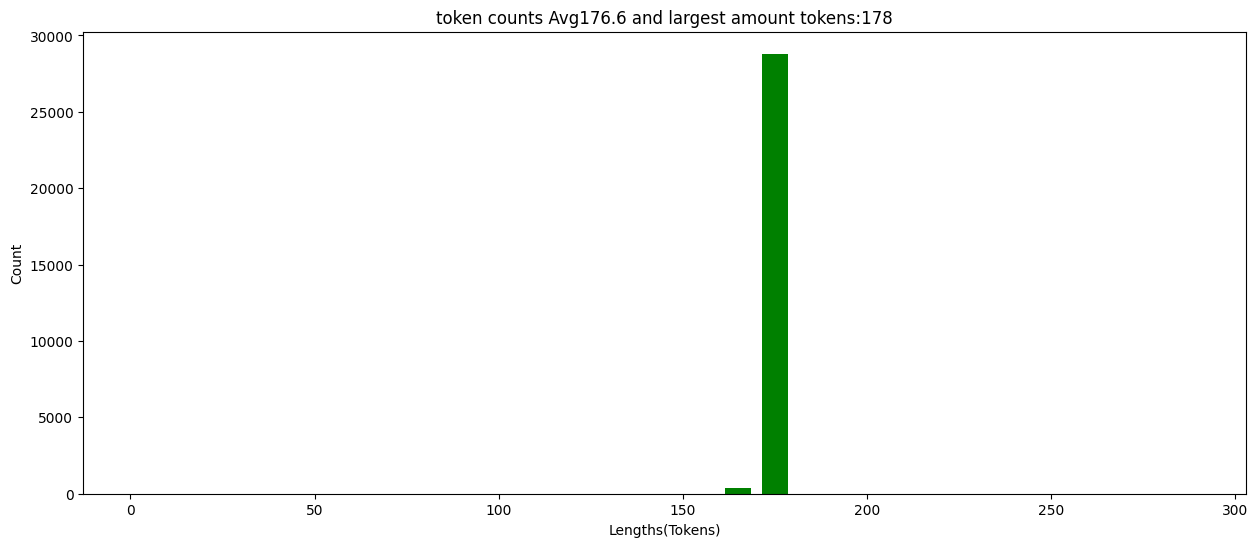

In [40]:
#plot the distribution of token counts
tokens = [item.token_count for item in items] 
plt.figure(figsize=(15, 6))
plt.title(f"token counts Avg{sum(tokens) / len(tokens):.1f} and largest amount tokens:{max(tokens)}")
plt.xlabel("Lengths(Tokens)")
plt.ylabel("Count")
plt.hist(tokens, bins=range(0, 300, 10), rwidth=0.7, color='green')
plt.show()


In [37]:
# plot the distribution of price counts
plt.figure(figsize=(15, 4))
plt.hist()

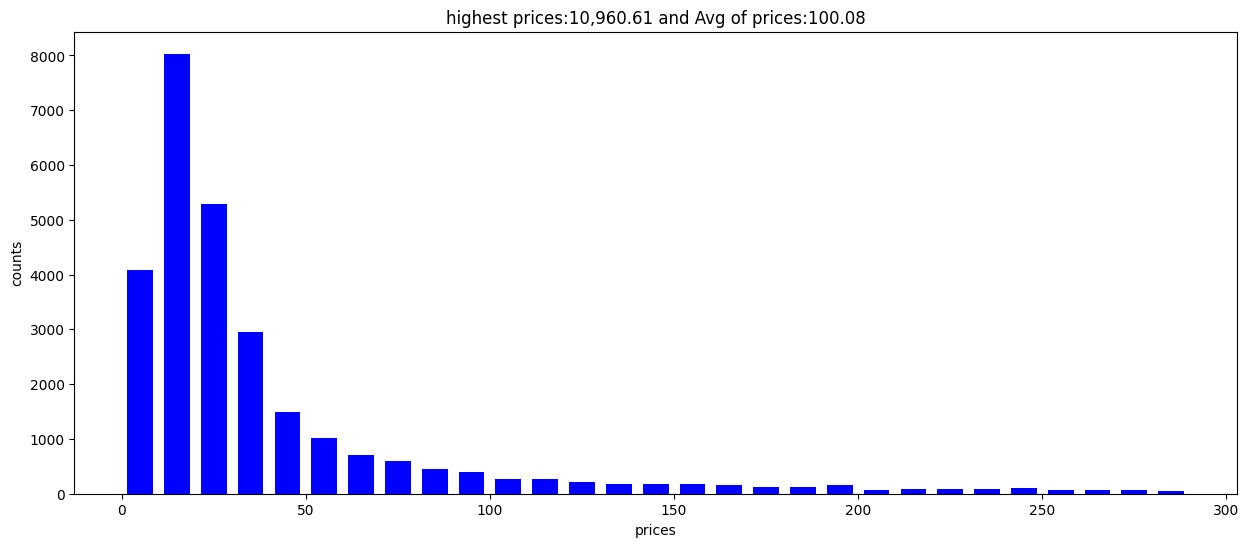

In [55]:
prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"highest prices:{max(prices):,.2f} and Avg of prices:{sum(prices) / len(prices):.2f}")
plt.xlabel("prices")
plt.ylabel("counts")
plt.hist(prices, rwidth=0.7, color='blue', bins=range(0, 300, 10))
plt.show()